In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [ ]:
file_path = "./data/assignmentMathImagingRecon_chestCT.mat"
with h5py.File(file_path, 'r') as mat_file:
    for key in mat_file.keys():
        print(f"Dataset: {key}, Shape: {mat_file[key].shape}")

Dataset: imageAC, Shape: (512, 512)


1


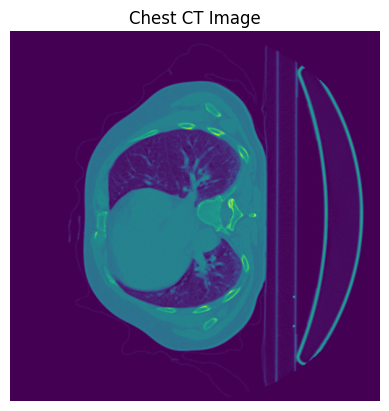

(512, 512)

In [21]:
#Loading Chest CT image
file_path = './data/assignmentMathImagingRecon_chestCT.mat'
with h5py.File(file_path, 'r') as mat:
    print(len(mat.keys()))
    dataset_name = list(mat.keys())[0]  
    chestCT = np.array(mat[dataset_name]) 
plt.imshow(chestCT)
plt.axis('off') 
plt.title("Chest CT Image")
plt.show()
chestCT.shape

c:\Users\yashv\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\transform\radon_transform.py:74: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn(


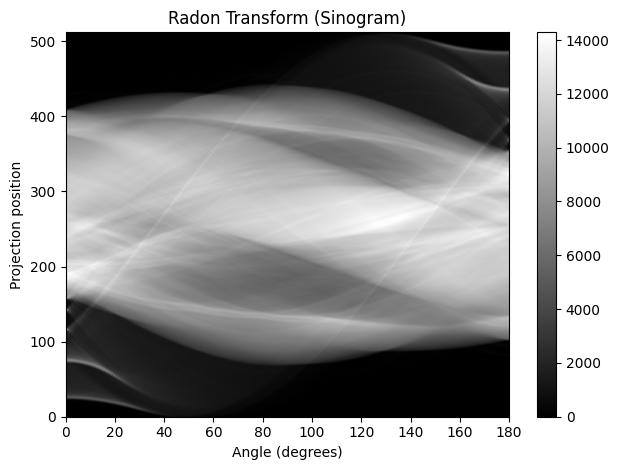

(512, 180)


In [36]:
from skimage.transform import radon
angles = np.linspace(0, 180, 180, endpoint=False) 
# print(angles)

sinogram = radon(chestCT, theta=angles)
#Radon transform (sinogram)

plt.imshow(sinogram, cmap='gray', aspect='auto', extent=(0, 180, 0, sinogram.shape[0]))
plt.title('Radon Transform (Sinogram)')
plt.xlabel('Angle (degrees)')
plt.ylabel('Projection position')
plt.colorbar()
plt.tight_layout()
plt.show()
print(sinogram.shape)

In [ ]:
def gaussian_noise(image, percentage):
    intensity_range=np.max(image)-np.min(image)
    noise=percentage*intensity_range
    gauss = np.random.normal(0, noise, image.shape) #Zero mean
    noisy_img=image+gauss
    return noisy_img

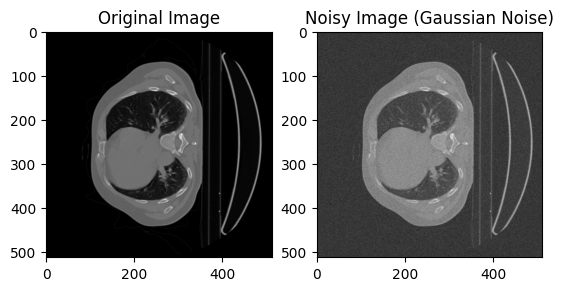

In [38]:
#Generating a noisy image 
noisy_img=gaussian_noise(chestCT,0.05)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(chestCT, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(noisy_img, cmap='gray')
ax[1].set_title("Noisy Image (Gaussian Noise)")
plt.show()

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, iradon

def myART(sinogram, angles, img_shape=(512, 512), iterations=10, relaxation=0.1):
    """
    Implements the Algebraic Reconstruction Technique (ART) for CT image reconstruction.

    Parameters:
        sinogram (ndarray): The Radon transform (sinogram) of the image.
        angles (ndarray): Array of projection angles in degrees.
        img_shape (tuple): Shape of the reconstructed image (e.g., (512, 512)).
        iterations (int): Number of ART iterations.
        relaxation (float): Relaxation parameter (step size).

    Returns:
        reconstructed_image (ndarray): The reconstructed image using ART.
    """
    # Initialize the reconstructed image with zeros
    reconstructed_image = np.zeros(img_shape)

    num_projections, num_detectors = sinogram.shape  # Get sinogram shape

    for _ in range(iterations):  # Iterate for refinement
        for i in range(num_projections):  # Loop through each projection angle
            angle = angles[i]  # Get current angle

            # Compute the forward projection for the current angle
            forward_proj = radon(reconstructed_image, theta=[angle], circle=True)[:, 0]

            # Compute the error between measured and estimated projections
            error = sinogram[i] - forward_proj  # Shape: (num_detectors,)

            # Reshape the error into a full sinogram format
            error_sinogram = np.zeros_like(sinogram)  # Shape: (num_projections, num_detectors)
            error_sinogram[i, :] = error  # Assign error only to the current angle

            # Compute back-projection of the error
            back_proj = iradon(error_sinogram, theta=angles, filter_name=None, circle=True)

            # Update reconstructed image using relaxation factor
            reconstructed_image += relaxation * back_proj

    return reconstructed_image

# Example usage
image_size = (512, 512)  # Define image size
angles = np.linspace(0, 179, 180)  # 180 angles from 0 to 179 degrees
phantom = np.random.rand(*image_size)  # Example phantom (replace with actual CT image)
sinogram = radon(phantom, theta=angles, circle=True)  # Generate Radon transform

# Apply ART reconstruction
reconstructed_image = myART(sinogram, angles, image_size)

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(phantom, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(reconstructed_image, cmap='gray')
ax[1].set_title("Reconstructed Image (ART)")
ax[1].axis("off")

plt.show()


ValueError: operands could not be broadcast together with shapes (180,) (512,) 

Building ray list ...
Total rays: 6660

Running ART with lambda = 0.10
Iteration 1/10, RRMSE = 0.6899
Iteration 2/10, RRMSE = 0.6429
Iteration 3/10, RRMSE = 0.6261
Iteration 4/10, RRMSE = 0.6207
Iteration 5/10, RRMSE = 0.6207
Iteration 6/10, RRMSE = 0.6234
Iteration 7/10, RRMSE = 0.6275
Iteration 8/10, RRMSE = 0.6323
Iteration 9/10, RRMSE = 0.6376
Iteration 10/10, RRMSE = 0.6430

Running ART with lambda = 0.20
Iteration 1/10, RRMSE = 0.6580
Iteration 2/10, RRMSE = 0.6332
Iteration 3/10, RRMSE = 0.6339
Iteration 4/10, RRMSE = 0.6413
Iteration 5/10, RRMSE = 0.6510
Iteration 6/10, RRMSE = 0.6614
Iteration 7/10, RRMSE = 0.6719
Iteration 8/10, RRMSE = 0.6822
Iteration 9/10, RRMSE = 0.6921
Iteration 10/10, RRMSE = 0.7017

Running ART with lambda = 0.30
Iteration 1/10, RRMSE = 0.6635
Iteration 2/10, RRMSE = 0.6499
Iteration 3/10, RRMSE = 0.6587
Iteration 4/10, RRMSE = 0.6725
Iteration 5/10, RRMSE = 0.6874
Iteration 6/10, RRMSE = 0.7019
Iteration 7/10, RRMSE = 0.7158
Iteration 8/10, RRMSE = 0.

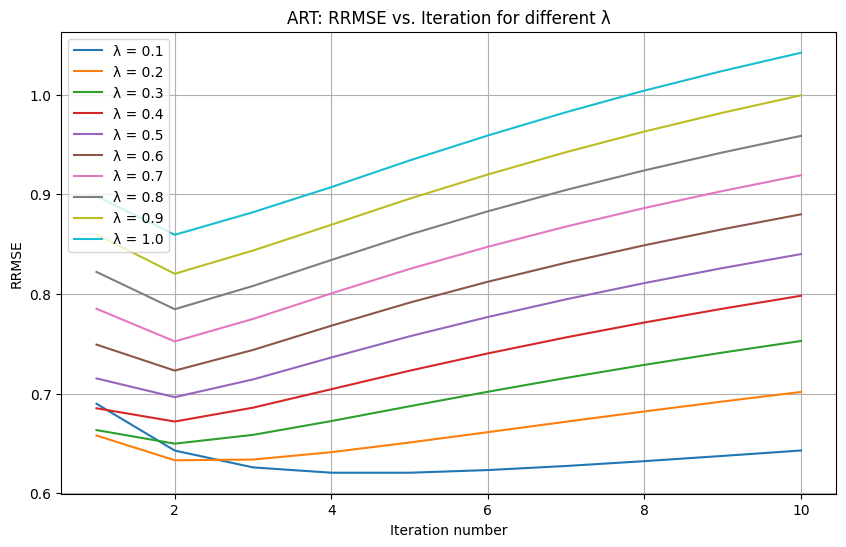

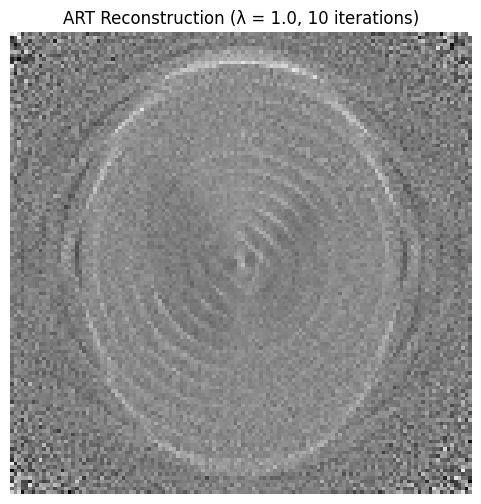

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom
from skimage.transform import resize
import random

def get_ray_weights(image_shape, t, theta, ds_sample=1.0):
    """
    For a given ray specified by (t, theta) (with t in pixel units and theta in degrees)
    compute the set of pixels that the ray passes through along with the weight contribution
    (here, using a nearest-neighbor approach). The image coordinate system is assumed to be
    centered (origin at center of image).
    
    Returns:
      weights_list: a list of tuples (i, j, weight) for each pixel (i,j) that the ray intersects.
      norm_sq: the squared L2 norm of the weight vector (i.e., sum of weight^2).
    """
    Nrows, Ncols = image_shape
    cx = (Ncols - 1) / 2.0
    cy = (Nrows - 1) / 2.0
    # s_max: length needed to cover image (distance from center to corner)
    s_max = np.hypot(cx, cy)
    s = np.arange(-s_max, s_max + ds_sample, ds_sample)
    theta_rad = np.deg2rad(theta)
    
    # Parameterize the ray (same as in Question 1):
    # x = t*cos(theta) - s*sin(theta)
    # y = t*sin(theta) + s*cos(theta)
    x_coords = t * np.cos(theta_rad) - s * np.sin(theta_rad)
    y_coords = t * np.sin(theta_rad) + s * np.cos(theta_rad)
    
    # Convert continuous coordinates (with origin at center, x right, y up)
    # to image pixel indices. Note: image row index increases downward.
    i_coords = np.round(cy - y_coords).astype(int)
    j_coords = np.round(cx + x_coords).astype(int)
    
    weights_dict = {}
    for i, j in zip(i_coords, j_coords):
        if 0 <= i < Nrows and 0 <= j < Ncols:
            weights_dict[(i, j)] = weights_dict.get((i, j), 0) + ds_sample
    weights_list = [(i, j, w) for ((i, j), w) in weights_dict.items()]
    norm_sq = sum([w**2 for (_, _, w) in weights_list])
    return weights_list, norm_sq

def compute_ray_projection(image, weights_list):
    """
    Given an image and a list of ray weights (obtained from get_ray_weights),
    compute the estimated projection (line integral) along that ray.
    """
    proj = 0.0
    for (i, j, w) in weights_list:
        proj += image[i, j] * w
    return proj

def build_ray_list(ground_truth, angles, t_values, ds_sample=1.0):
    """
    For a given ground-truth image, a list of projection angles (in degrees), and a list of t values,
    compute for each ray the weight list and the measured projection b (computed from ground truth).
    Noise is added to b (with 5% of the intensity range).
    
    Returns:
      rays: a list of dictionaries. Each dictionary has keys:
         'theta': projection angle in degrees,
         't': detector coordinate,
         'weights': list of (i, j, weight),
         'norm_sq': squared norm of the weight vector,
         'b': measured projection (with noise).
    """
    rays = []
    # First compute all noiseless projections
    b_list = []
    for theta in angles:
        for t in t_values:
            weights_list, norm_sq = get_ray_weights(ground_truth.shape, t, theta, ds_sample)
            proj = compute_ray_projection(ground_truth, weights_list)
            rays.append({'theta': theta, 't': t, 'weights': weights_list, 'norm_sq': norm_sq, 'b': proj})
            b_list.append(proj)
    b_array = np.array(b_list)
    # Determine noise standard deviation: 5% of intensity range of b
    noise_std = 0.05 * (np.max(b_array) - np.min(b_array))
    # Add Gaussian noise to each ray's measured projection b
    for ray in rays:
        ray['b'] = ray['b'] + np.random.normal(0, noise_std)
    return rays

def compute_RRMSE(A, B):
    """Compute the Relative Root Mean Squared Error between images A and B."""
    return np.sqrt(np.sum((A - B)**2)) / np.sqrt(np.sum(A**2))

def myART(ground_truth, rays, num_iterations, lambda_val, ordering='sequential'):
    """
    Implements the ART algorithm.
    
    Parameters:
      ground_truth: 2D numpy array, the ground truth image.
      rays:         List of ray dictionaries (from build_ray_list). Each ray contains:
                    'theta', 't', 'weights', 'norm_sq', and measured projection 'b'.
      num_iterations: Number of full sweeps (epochs) over the rays.
      lambda_val:     The relaxation (step-length) parameter.
      ordering:       'sequential' or 'random' ordering of ray updates.
      
    Returns:
      x: The reconstructed image (2D numpy array).
      rrmse_hist: List of RRMSE values (one per iteration).
    """
    Nrows, Ncols = ground_truth.shape
    x = np.zeros((Nrows, Ncols), dtype=np.float64)  # initial estimate: all zeros
    rrmse_hist = []
    num_rays = len(rays)
    
    for it in range(num_iterations):
        # Choose ordering
        if ordering == 'random':
            current_rays = random.sample(rays, num_rays)
        else:  # sequential
            current_rays = rays
        
        # Process each ray in current order
        for ray in current_rays:
            weights_list = ray['weights']
            norm_sq = ray['norm_sq']
            if norm_sq == 0:
                continue
            # Compute estimated projection from current x
            p_est = compute_ray_projection(x, weights_list)
            error = ray['b'] - p_est
            # ART update: for each pixel along the ray
            for (i, j, w) in weights_list:
                x[i, j] += lambda_val * error * w / norm_sq
        
        # Compute RRMSE after each full sweep
        rrmse = compute_RRMSE(ground_truth, x)
        rrmse_hist.append(rrmse)
        print(f"Iteration {it+1}/{num_iterations}, RRMSE = {rrmse:.4f}")
    
    return x, rrmse_hist

def main():
    # For demonstration, we use the Shepp-Logan phantom as a stand-in for chestCT.
    # In practice, load your chestCT.mat ground-truth image.
    phantom = shepp_logan_phantom()
    ground_truth = resize(phantom, (128, 128), mode='reflect', anti_aliasing=True)
    
    # Define projection parameters:
    angles = np.arange(0, 180, 1)   # 180 angles: 0, 1, ..., 179 degrees.
    # For each angle, use a set of detector positions (t values) that cover the object.
    Nrows, Ncols = ground_truth.shape
    cx = (Ncols - 1) / 2.0
    cy = (Nrows - 1) / 2.0
    max_t = np.hypot(cx, cy)
    # For computational efficiency, use a coarser sampling (e.g., every 5 pixels)
    t_values = np.arange(-max_t, max_t + 1, 5)
    ds_sample = 1.0  # step size for ray sampling (along each ray)
    
    # Build the list of rays (this constructs the imaging matrix "on the fly" without forming A explicitly)
    print("Building ray list ...")
    rays = build_ray_list(ground_truth, angles, t_values, ds_sample=ds_sample)
    print(f"Total rays: {len(rays)}")
    
    # Set number of ART iterations (epochs)
    num_iterations = 10  # you may increase this for better convergence
    
    # Part (b): For a fixed ordering (sequential), run ART for different lambda values
    lambda_values = np.arange(0.1, 1.01, 0.1)
    plt.figure(figsize=(10, 6))
    
    # For each lambda, run ART and record the RRMSE evolution
    for lambda_val in lambda_values:
        print(f"\nRunning ART with lambda = {lambda_val:.2f}")
        # Reinitialize reconstruction for each lambda
        x_recon, rrmse_hist = myART(ground_truth, rays, num_iterations, lambda_val, ordering='sequential')
        iterations = np.arange(1, num_iterations+1)
        plt.plot(iterations, rrmse_hist, label=f"λ = {lambda_val:.1f}")
    
    plt.xlabel("Iteration number")
    plt.ylabel("RRMSE")
    plt.title("ART: RRMSE vs. Iteration for different λ")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # You can also display the final reconstruction for one (or more) lambda values.
    # Here we show the reconstruction from the last lambda value.
    plt.figure(figsize=(6,6))
    plt.imshow(x_recon, cmap='gray')
    plt.title(f"ART Reconstruction (λ = {lambda_val:.1f}, {num_iterations} iterations)")
    plt.axis('off')
    plt.show()
    
if __name__ == "__main__":
    main()
